1) Make a DataFrame with one row per issue with the following columns extracted
from the issue data:

   ``ntitle, created_at, labels, closed_at, user, id``

Transform the user values to be simply the 'login' string, so that the user
column contains only string usernames.

2) Remove duplicate rows by id from the DataFrame you just created using the id
column's duplicated method.

4) Convert the ``created_at`` and ``closed_at columns`` from string to datetime type.

5) Now construct appropriate time series and pandas functions to make the
following plots:

- Number of issues created by month

- Number of distinct users creating issues each month (hint: you can pass a
  function to resample's how argument, and there's nothing wrong with having
  string values in a TimeSeries)

6) Make a table and an accompanying plot illustrating:

- The mean number of days it took for issues to be closed by the month they
  were opened. In other words, for closed issues created in August 2012, how
  long were they open on average? (hint: use the ``total_seconds`` function on the
  timedelta objects computed when subtracting datetime objects). Also show the
  number of issues in each month in the table.

7) Make a DataFrame containing all the comments for all of the issues. You will
want to add an ``id`` attribute to each comment while doing so so that each row
contains a single comment and has the id of the issue it belongs to.

Convert the ``created`` column to datetime format; note you will need to multiply
the values (appropriately converted to integers) by 1000000 to get them in
nanoseconds and pass to to_datetime.

8) For each month, compute a table summarizing the following for each month:

- Total number of issue comments
- The "chattiest" user (most number of comments)
- The percentage of total comments made by the chattiest users
- The number of distinct participants in the issue comments

9) Create a helper ``labels`` table from the issues data with two columns: id and
label. If an issue has 3 elements in its 'labels' value, add 3 rows to the
table. If an issue does not have any labels, place a single row with None as
the label (hint: construct a list of tuples, then make the DataFrame).

10) Now, join the issues data with the labels helper table (pandas.merge). Add
a column to this table containing the number of days (as a floating point
number) it took to close each issue.

11) Compute a table containing the average time to close for each label
type. Now make a plot comparing mean time to close by month for Enhancement
versus Bug issue types.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Several ways to convert to date
from datetime import datetime
import dateutil.parser as parser

In [ ]:
!pwd

In [ ]:
!ls

In [ ]:
!head closed.json

In [3]:
df = pd.read_json('closed.json')

In [4]:
df.shape # (2968, 19)

(2968, 19)

In [5]:
df.columns

Index(['assignee', 'body', 'closed_at', 'comments', 'comments_url',
       'created_at', 'events_url', 'html_url', 'id', 'labels', 'labels_url',
       'milestone', 'number', 'pull_request', 'state', 'title', 'updated_at',
       'url', 'user'],
      dtype='object')

In [7]:
df2 = df[['title', 'created_at', 'labels', 'closed_at', 'user', 'id']]
df2

,title,created_at,labels,closed_at,user,id
0,Enable element-wise comparison operations in D...,2010-09-29 00:45:31,[],2011-02-19 23:13:48,{'followers_url': 'https://api.github.com/user...,337721
1,Enable element-wise comparison operations in D...,2010-09-29 00:45:31,[],2011-02-19 23:13:48,{'followers_url': 'https://api.github.com/user...,337721
2,reindex_like function,2010-09-29 00:50:13,[],2010-12-17 02:57:33,{'followers_url': 'https://api.github.com/user...,337726
3,reindex_like function,2010-09-29 00:50:13,[],2010-12-17 02:57:33,{'followers_url': 'https://api.github.com/user...,337726
4,Binary operations on int DataMatrix,2010-09-29 00:50:52,[],2011-01-01 23:50:12,{'followers_url': 'https://api.github.com/user...,337728
5,Binary operations on int DataMatrix,2010-09-29 00:50:52,[],2011-01-01 23:50:12,{'followers_url': 'https://api.github.com/user...,337728
6,Plot keyword arguments are unused in DataFrame...,2010-09-29 00:51:27,[],2010-12-11 06:14:32,{'followers_url': 'https://api.github.com/user...,337730
7,Plot keyword arguments are unused in DataFrame...,2010-09-29 00:51:27,[],2010-12-11 06:14:32,{'followers_url': 'https://api.github.com/user...,337730
8,Python 2.7 testing,2010-09-29 00:57:00,[],2010-12-17 02:46:34,{'followers_url': 'https://api.github.com/user...,337736
9,Python 2.7 testing,2010-09-29 00:57:00,[],2010-12-17 02:46:34,{'followers_url': 'https://api.github.com/user...,337736


In [ ]:
df2.describe()

In [ ]:
df2.user[0]

In [ ]:
type(df2.user[0]) # We note that df2.user[0] is a dictionary

In [8]:
tmp = [df2.user[i]['login'] for i in range(2968)]

In [9]:
df2.user = tmp

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [ ]:
df2.loc[:,'user'] = tmp

In [ ]:
df2.user

In [ ]:
#----- Task 3: Removing Duplicate Entries -----#

In [10]:
df3 = df2.drop_duplicates(subset='id', keep = "last")

In [11]:
df3.created_at

1      2010-09-29 00:45:31
3      2010-09-29 00:50:13
5      2010-09-29 00:50:52
7      2010-09-29 00:51:27
9      2010-09-29 00:57:00
11     2010-09-29 05:30:56
13     2010-09-29 15:41:55
15     2010-09-29 19:45:47
17     2010-09-30 22:29:36
19     2010-09-30 22:33:14
21     2010-09-30 22:34:26
23     2010-10-03 17:20:41
25     2010-10-07 23:42:34
27     2010-10-11 03:19:39
29     2010-10-12 16:10:48
31     2010-10-12 16:13:04
33     2010-10-12 16:13:55
35     2010-10-12 16:15:10
37     2010-10-22 17:59:31
39     2010-11-19 14:50:11
41     2010-11-19 18:41:36
43     2010-12-14 16:50:11
45     2010-12-22 10:37:40
47     2010-12-24 07:27:52
49     2010-12-24 07:32:39
51     2011-01-03 17:15:19
53     2011-01-03 23:29:47
55     2011-01-11 04:14:15
57     2011-01-11 12:15:39
59     2011-01-11 12:31:34
               ...        
2938   2013-04-23 12:52:18
2939   2013-04-23 18:17:44
2940   2013-04-23 20:38:47
2941   2013-04-23 21:05:03
2942   2013-04-23 23:02:13
2943   2013-04-24 15:31:12
2

In [ ]:
df3.closed_at #Already converted to datetime type ...

In [ ]:
df2.shape

In [ ]:
df3.shape #Removed 34 duplicated entries

In [12]:
#----- Task 4 -----#
df3.columns

Index(['title', 'created_at', 'labels', 'closed_at', 'user', 'id'], dtype='object')

In [13]:
df3.index

Int64Index([   1,    3,    5,    7,    9,   11,   13,   15,   17,   19,
            ...
            2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967],
           dtype='int64', length=2934)

In [14]:
#----------- Task 4 -------------#
#df3.resample('M', how={'created_at','count'})

In [15]:
import pylab
import matplotlib.pyplot as plt

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [18]:
tmp2 = df3.groupby('created_at').count()
tmp3 = tmp2.resample('M', how='sum')


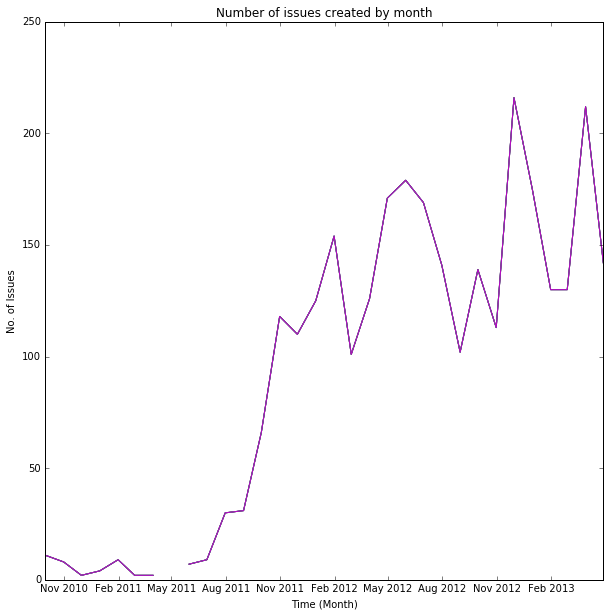

In [19]:
plt.plot(tmp3)
plt.title('Number of issues created by month')
plt.xlabel('Time (Month)')
plt.ylabel('No. of Issues')


### Number of distinct users creating issues each month

In [20]:
tmp2['user'].resample('M', how='sum')

created_at
2010-09-30     11
2010-10-31      8
2010-11-30      2
2010-12-31      4
2011-01-31      9
2011-02-28      2
2011-03-31      2
2011-04-30    NaN
2011-05-31      7
2011-06-30      9
2011-07-31     30
2011-08-31     31
2011-09-30     66
2011-10-31    118
2011-11-30    110
2011-12-31    125
2012-01-31    154
2012-02-29    101
2012-03-31    126
2012-04-30    171
2012-05-31    179
2012-06-30    169
2012-07-31    141
2012-08-31    102
2012-09-30    139
2012-10-31    113
2012-11-30    216
2012-12-31    175
2013-01-31    130
2013-02-28    130
2013-03-31    212
2013-04-30    142
Freq: M, Name: user, dtype: float64

In [21]:
tmp2

,title,labels,closed_at,user,id
created_at,,,,,
2010-09-29 00:45:31,1,1,1,1,1
2010-09-29 00:50:13,1,1,1,1,1
2010-09-29 00:50:52,1,1,1,1,1
2010-09-29 00:51:27,1,1,1,1,1
2010-09-29 00:57:00,1,1,1,1,1
2010-09-29 05:30:56,1,1,1,1,1
2010-09-29 15:41:55,1,1,1,1,1
2010-09-29 19:45:47,1,1,1,1,1
2010-09-30 22:29:36,1,1,1,1,1


In [22]:
df4 = pd.pivot_table(df3, index = 'created_at', columns = ['user'])
df4

id                                                     \
user                Aico Aldanor Altons Anaphory BenjaminKay Bklyn BrenBarn   
created_at                                                                    
2010-09-29 00:45:31  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-09-29 00:50:13  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-09-29 00:50:52  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-09-29 00:51:27  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-09-29 00:57:00  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-09-29 05:30:56  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-09-29 15:41:55  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-09-29 19:45:47  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-09-30 22:29:36  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-09-30 22:33:14  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-09-30 22:34:26  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-10-03 17:20:41  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-10-07 23:42:34  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-10-11 03:19:39  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-10-12 16:10:48  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-10-12 16:13:04  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-10-12 16:13:55  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-10-12 16:15:10  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-10-22 17:59:31  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-11-19 14:50:11  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-11-19 18:41:36  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-12-14 16:50:11  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-12-22 10:37:40  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-12-24 07:27:52  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2010-12-24 07:32:39  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2011-01-03 17:15:19  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2011-01-03 23:29:47  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2011-01-11 04:14:15  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2011-01-11 12:15:39  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2011-01-11 12:31:34  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
...                  ...     ...    ...      ...         ...   ...      ...   
2013-04-23 12:52:18  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-23 18:17:44  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-23 20:38:47  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-23 21:05:03  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-23 23:02:13  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-24 15:31:12  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-24 17:01:42  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-24 18:17:18  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-24 21:30:46  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-24 22:07:11  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-24 22:39:37  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-25 00:05:20  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-25 01:10:17  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-25 06:40:46  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-25 10:49:27  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-25 12:29:18  NaN     NaN    NaN      NaN         NaN   NaN      NaN   
2013-04-25 12:53:19  NaN     NaN    NaN      NaN         NaN   NaN      

In [24]:
df4b = df4.resample('M', how = 'count')
df4b

id                                                              \
user       Aico Aldanor Altons Anaphory BenjaminKay Bklyn BrenBarn CRP Cd48   
created_at                                                                    
2010-09-30    0       0      0        0           0     0        0   0    0   
2010-10-31    0       0      0        0           0     0        0   0    0   
2010-11-30    0       0      0        0           0     0        0   0    0   
2010-12-31    0       0      0        0           0     0        0   0    0   
2011-01-31    0       0      0        0           0     0        0   0    0   
2011-02-28    0       0      0        0           0     0        0   0    0   
2011-03-31    0       0      0        0           0     0        0   0    0   
2011-04-30    0       0      0        0           0     0        0   0    0   
2011-05-31    0       0      0        0           0     0        0   0    0   
2011-06-30    0       0      0        0           0     0        0   0    0   
2011-07-31    0       0      0        0           0     0        0   0    0   
2011-08-31    0       0      0        0           0     0        0   0    0   
2011-09-30    0       0      1        0           0     0        0   0    0   
2011-10-31    0       0      0        0           0     0        0   1    0   
2011-11-30    0       0      0        0           0     0        0   5    0   
2011-12-31    0       0      0        0           0     0        0   3    0   
2012-01-31    0       0      0        0           0     0        0   0    0   
2012-02-29    0       0      0        0           0     0        0   2    0   
2012-03-31    0       0      0        0           0     0        0   1    0   
2012-04-30    0       0      0        0           0     0        0   0    0   
2012-05-31    0       0      0        0           0     0        0   0    0   
2012-06-30    0       0      0        0           0     0        0   1    0   
2012-07-31    0       0      0        0           0     0        1   3    0   
2012-08-31    0       0      0        0           0     0        0   1    0   
2012-09-30    0       0      0        0           0     0        0   1    0   
2012-10-31    0       0      0        0           0     0        0   0    0   
2012-11-30    0       0      0        1           0     0        0   1    0   
2012-12-31    0       2      0        0           0     0        0   0    0   
2013-01-31    0       0      0        0           0     1        0   0    1   
2013-02-28    1       0      0        0           0     0        0   0    0   
2013-03-31    0       0      0        0           0     0        0   0    0   
2013-04-30    0       0      0        0           2     0        0   0    0   

                                  ...                                       \
user       CerebralMastication    ...     y-p yangzetian yarden yarikoptic   
created_at                        ...                                        
2010-09-30                   0    ...       0          0      0          0   
2010-10-31                   0    ...       0          0      0          0   
2010-11-30                   0    ...       0          0      0          0   
2010-12-31                   0    ...       0          0      0          0   
2011-01-31                   0    ...       0          0      0          0   
2011-02-28                   0    ...       0          0      0          0   
2011-03-31                   0    ...       0          0      0          0   
2011-04-30                   0    ...       0          0      0          0   
2011-05-31                   0    ...       0          0      0          0   
2011-06-30                   0    ...       0          0      0          0   
2011-07-31                   0    ...       0          0      0          0   
2011-08-31                   0    ...       0          0      0          0   
2011-09-30                   0    ...       0          0      0          2   

In [25]:
df5 = df4b.apply(lambda x: x != 0)
df5

id                                                             \
user         Aico Aldanor Altons Anaphory BenjaminKay  Bklyn BrenBarn    CRP   
created_at                                                                     
2010-09-30  False   False  False    False       False  False    False  False   
2010-10-31  False   False  False    False       False  False    False  False   
2010-11-30  False   False  False    False       False  False    False  False   
2010-12-31  False   False  False    False       False  False    False  False   
2011-01-31  False   False  False    False       False  False    False  False   
2011-02-28  False   False  False    False       False  False    False  False   
2011-03-31  False   False  False    False       False  False    False  False   
2011-04-30  False   False  False    False       False  False    False  False   
2011-05-31  False   False  False    False       False  False    False  False   
2011-06-30  False   False  False    False       False  False    False  False   
2011-07-31  False   False  False    False       False  False    False  False   
2011-08-31  False   False  False    False       False  False    False  False   
2011-09-30  False   False   True    False       False  False    False  False   
2011-10-31  False   False  False    False       False  False    False   True   
2011-11-30  False   False  False    False       False  False    False   True   
2011-12-31  False   False  False    False       False  False    False   True   
2012-01-31  False   False  False    False       False  False    False  False   
2012-02-29  False   False  False    False       False  False    False   True   
2012-03-31  False   False  False    False       False  False    False   True   
2012-04-30  False   False  False    False       False  False    False  False   
2012-05-31  False   False  False    False       False  False    False  False   
2012-06-30  False   False  False    False       False  False    False   True   
2012-07-31  False   False  False    False       False  False     True   True   
2012-08-31  False   False  False    False       False  False    False   True   
2012-09-30  False   False  False    False       False  False    False   True   
2012-10-31  False   False  False    False       False  False    False  False   
2012-11-30  False   False  False     True       False  False    False   True   
2012-12-31  False    True  False    False       False  False    False  False   
2013-01-31  False   False  False    False       False   True    False  False   
2013-02-28   True   False  False    False       False  False    False  False   
2013-03-31  False   False  False    False       False  False    False  False   
2013-04-30  False   False  False    False        True  False    False  False   

                                         ...                               \
user         Cd48 CerebralMastication    ...        y-p yangzetian yarden   
created_at                               ...                                
2010-09-30  False               False    ...      False      False  False   
2010-10-31  False               False    ...      False      False  False   
2010-11-30  False               False    ...      False      False  False   
2010-12-31  False               False    ...      False      False  False   
2011-01-31  False               False    ...      False      False  False   
2011-02-28  False               False    ...      False      False  False   
2011-03-31  False               False    ...      False      False  False   
2011-04-30  False               False    ...      False      False  False   
2011-05-31  False               False    ...      False      False  False   
2011-06-30  False               False    ...      False      False  False   
2011-07-31  False               False    ...      False      False  False   
2011-08-31  False               False    ...      False      False  False   
2011-09-30  False               False    ...      False    

In [26]:
ans4 = (df5).apply(np.sum, axis = 1)
ans4

created_at
2010-09-30     2
2010-10-31     3
2010-11-30     2
2010-12-31     3
2011-01-31     5
2011-02-28     2
2011-03-31     1
2011-04-30     0
2011-05-31     3
2011-06-30     3
2011-07-31     9
2011-08-31    10
2011-09-30    14
2011-10-31    17
2011-11-30    25
2011-12-31    22
2012-01-31    41
2012-02-29    26
2012-03-31    47
2012-04-30    39
2012-05-31    26
2012-06-30    55
2012-07-31    52
2012-08-31    46
2012-09-30    53
2012-10-31    47
2012-11-30    63
2012-12-31    66
2013-01-31    55
2013-02-28    56
2013-03-31    56
2013-04-30    49
Freq: M, dtype: int64

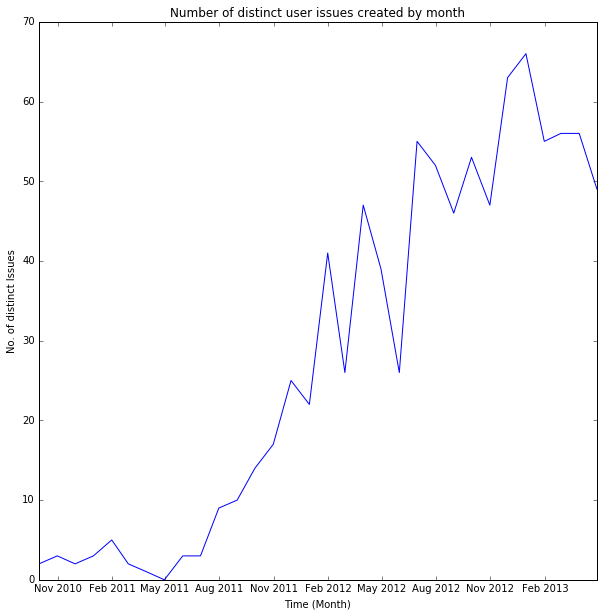

In [27]:
plt.plot(ans4)
plt.title('Number of distinct user issues created by month')
plt.xlabel('Time (Month)')
plt.ylabel('No. of distinct Issues')

### Task 6: Make a table and an accompanying plot illustrating:

- The mean number of days it took for issues to be closed by the month they
  were opened. In other words, for closed issues created in August 2012, how
  long were they open on average? (hint: use the ``total_seconds`` function on the
  timedelta objects computed when subtracting datetime objects). Also show the
  number of issues in each month in the table.

In [28]:
df3

,title,created_at,labels,closed_at,user,id
1,Enable element-wise comparison operations in D...,2010-09-29 00:45:31,[],2011-02-19 23:13:48,wesm,337721
3,reindex_like function,2010-09-29 00:50:13,[],2010-12-17 02:57:33,wesm,337726
5,Binary operations on int DataMatrix,2010-09-29 00:50:52,[],2011-01-01 23:50:12,wesm,337728
7,Plot keyword arguments are unused in DataFrame...,2010-09-29 00:51:27,[],2010-12-11 06:14:32,wesm,337730
9,Python 2.7 testing,2010-09-29 00:57:00,[],2010-12-17 02:46:34,wesm,337736
11,Fix argument inconsistency in pandas.stats.mom...,2010-09-29 05:30:56,[],2010-12-11 06:05:26,wesm,337994
13,DataMatrix constructor ignores dtype argument ...,2010-09-29 15:41:55,[],2010-12-11 06:12:00,andylei,338909
15,np.fix doesn't work,2010-09-29 19:45:47,"[{'name': 'Bug', 'url': 'https://api.github.co...",2011-06-23 04:50:05,andylei,339355
17,Fix pandas.io.parsers.parseExcel to be more ro...,2010-09-30 22:29:36,[],2011-05-18 02:43:33,wesm,341577
19,Improvements to pandas.io.pytables / unit testing,2010-09-30 22:33:14,[],2011-06-23 19:38:51,wesm,341581


In [ ]:
# Under modification
#df3b = df3.pivot_table(values = ['created_at', 'closed_at', 'id'], index = ['created_at'] )

In [29]:
df3[['closed_at', 'created_at']]

,closed_at,created_at
1,2011-02-19 23:13:48,2010-09-29 00:45:31
3,2010-12-17 02:57:33,2010-09-29 00:50:13
5,2011-01-01 23:50:12,2010-09-29 00:50:52
7,2010-12-11 06:14:32,2010-09-29 00:51:27
9,2010-12-17 02:46:34,2010-09-29 00:57:00
11,2010-12-11 06:05:26,2010-09-29 05:30:56
13,2010-12-11 06:12:00,2010-09-29 15:41:55
15,2011-06-23 04:50:05,2010-09-29 19:45:47
17,2011-05-18 02:43:33,2010-09-30 22:29:36
19,2011-06-23 19:38:51,2010-09-30 22:33:14


In [45]:
df3['service_time'] = df3.apply(lambda x: x['closed_at'] - x['created_at'], axis = 1)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
df3

,title,created_at,labels,closed_at,user,id,service_time
1,Enable element-wise comparison operations in D...,2010-09-29 00:45:31,[],2011-02-19 23:13:48,wesm,337721,143 days 22:28:17
3,reindex_like function,2010-09-29 00:50:13,[],2010-12-17 02:57:33,wesm,337726,79 days 02:07:20
5,Binary operations on int DataMatrix,2010-09-29 00:50:52,[],2011-01-01 23:50:12,wesm,337728,94 days 22:59:20
7,Plot keyword arguments are unused in DataFrame...,2010-09-29 00:51:27,[],2010-12-11 06:14:32,wesm,337730,73 days 05:23:05
9,Python 2.7 testing,2010-09-29 00:57:00,[],2010-12-17 02:46:34,wesm,337736,79 days 01:49:34
11,Fix argument inconsistency in pandas.stats.mom...,2010-09-29 05:30:56,[],2010-12-11 06:05:26,wesm,337994,73 days 00:34:30
13,DataMatrix constructor ignores dtype argument ...,2010-09-29 15:41:55,[],2010-12-11 06:12:00,andylei,338909,72 days 14:30:05
15,np.fix doesn't work,2010-09-29 19:45:47,"[{'name': 'Bug', 'url': 'https://api.github.co...",2011-06-23 04:50:05,andylei,339355,266 days 09:04:18
17,Fix pandas.io.parsers.parseExcel to be more ro...,2010-09-30 22:29:36,[],2011-05-18 02:43:33,wesm,341577,229 days 04:13:57
19,Improvements to pandas.io.pytables / unit testing,2010-09-30 22:33:14,[],2011-06-23 19:38:51,wesm,341581,265 days 21:05:37


In [103]:
df3b = pd.DataFrame(df3[['created_at', 'service_time']])
df3b

,created_at,service_time
1,2010-09-29 00:45:31,143 days 22:28:17
3,2010-09-29 00:50:13,79 days 02:07:20
5,2010-09-29 00:50:52,94 days 22:59:20
7,2010-09-29 00:51:27,73 days 05:23:05
9,2010-09-29 00:57:00,79 days 01:49:34
11,2010-09-29 05:30:56,73 days 00:34:30
13,2010-09-29 15:41:55,72 days 14:30:05
15,2010-09-29 19:45:47,266 days 09:04:18
17,2010-09-30 22:29:36,229 days 04:13:57
19,2010-09-30 22:33:14,265 days 21:05:37


In [106]:
df3b.index = df3b['created_at']


In [107]:
df3b

,created_at,service_time
created_at,,
2010-09-29 00:45:31,2010-09-29 00:45:31,143 days 22:28:17
2010-09-29 00:50:13,2010-09-29 00:50:13,79 days 02:07:20
2010-09-29 00:50:52,2010-09-29 00:50:52,94 days 22:59:20
2010-09-29 00:51:27,2010-09-29 00:51:27,73 days 05:23:05
2010-09-29 00:57:00,2010-09-29 00:57:00,79 days 01:49:34
2010-09-29 05:30:56,2010-09-29 05:30:56,73 days 00:34:30
2010-09-29 15:41:55,2010-09-29 15:41:55,72 days 14:30:05
2010-09-29 19:45:47,2010-09-29 19:45:47,266 days 09:04:18
2010-09-30 22:29:36,2010-09-30 22:29:36,229 days 04:13:57


### 

In [108]:
df3b.index

DatetimeIndex(['2010-09-29 00:45:31', '2010-09-29 00:50:13',
               '2010-09-29 00:50:52', '2010-09-29 00:51:27',
               '2010-09-29 00:57:00', '2010-09-29 05:30:56',
               '2010-09-29 15:41:55', '2010-09-29 19:45:47',
               '2010-09-30 22:29:36', '2010-09-30 22:33:14',
               ...
               '2013-04-25 21:27:25', '2013-04-26 18:11:36',
               '2013-04-26 18:51:30', '2013-04-26 21:14:43',
               '2013-04-27 00:53:30', '2013-04-27 03:19:17',
               '2013-04-27 07:54:23', '2013-04-27 15:50:49',
               '2013-04-28 01:10:48', '2013-04-28 15:27:23'],
              dtype='datetime64[ns]', name='created_at', length=2934, freq=None)

In [74]:
df3b.index

DatetimeIndex(['1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000009',
               '1970-01-01 00:00:00.000000011',
               '1970-01-01 00:00:00.000000013',
               '1970-01-01 00:00:00.000000015',
               '1970-01-01 00:00:00.000000017',
               '1970-01-01 00:00:00.000000019',
               ...
               '1970-01-01 00:00:00.000002958',
               '1970-01-01 00:00:00.000002959',
               '1970-01-01 00:00:00.000002960',
               '1970-01-01 00:00:00.000002961',
               '1970-01-01 00:00:00.000002962',
               '1970-01-01 00:00:00.000002963',
               '1970-01-01 00:00:00.000002964',
               '1970-01-01 00:00:00.000002965',
               '1970-01-01 00:00:00.000002966',
               '1970-01-01 00:00:00.000002967'],
              dtype=

In [109]:
df3b.values

array([[Timestamp('2010-09-29 00:45:31'), Timedelta('143 days 22:28:17')],
       [Timestamp('2010-09-29 00:50:13'), Timedelta('79 days 02:07:20')],
       [Timestamp('2010-09-29 00:50:52'), Timedelta('94 days 22:59:20')],
       ..., 
       [Timestamp('2013-04-27 15:50:49'), Timedelta('2 days 06:03:56')],
       [Timestamp('2013-04-28 01:10:48'), Timedelta('0 days 00:19:51')],
       [Timestamp('2013-04-28 15:27:23'), Timedelta('0 days 09:37:29')]], dtype=object)

In [110]:
df3b.ix[2,'service_time'].total_seconds()

8204360.000000001

In [118]:
for i in range(len(df3b)):
    #df3b[i,'service_time_sec'] = (df3b.ix[i,'service_time'].total_seconds())/(24*60*60)
    df3b.ix[i,'service_time_day'] = (df3b.ix[i,'service_time'].total_seconds()/(24*60*60))

In [119]:
df3b

,created_at,service_time,service_time_sec,service_time_day
created_at,,,,
2010-09-29 00:45:31,2010-09-29 00:45:31,143 days 22:28:17,143.936308,143.936308
2010-09-29 00:50:13,2010-09-29 00:50:13,79 days 02:07:20,79.088426,79.088426
2010-09-29 00:50:52,2010-09-29 00:50:52,94 days 22:59:20,94.957870,94.957870
2010-09-29 00:51:27,2010-09-29 00:51:27,73 days 05:23:05,73.224363,73.224363
2010-09-29 00:57:00,2010-09-29 00:57:00,79 days 01:49:34,79.076088,79.076088
2010-09-29 05:30:56,2010-09-29 05:30:56,73 days 00:34:30,73.023958,73.023958
2010-09-29 15:41:55,2010-09-29 15:41:55,72 days 14:30:05,72.604225,72.604225
2010-09-29 19:45:47,2010-09-29 19:45:47,266 days 09:04:18,266.377986,266.377986
2010-09-30 22:29:36,2010-09-30 22:29:36,229 days 04:13:57,229.176354,229.176354


In [120]:
# ---- Finalizing Results ---- #
res6 = df3b['service_time_day'].resample('M',how = 'mean' )

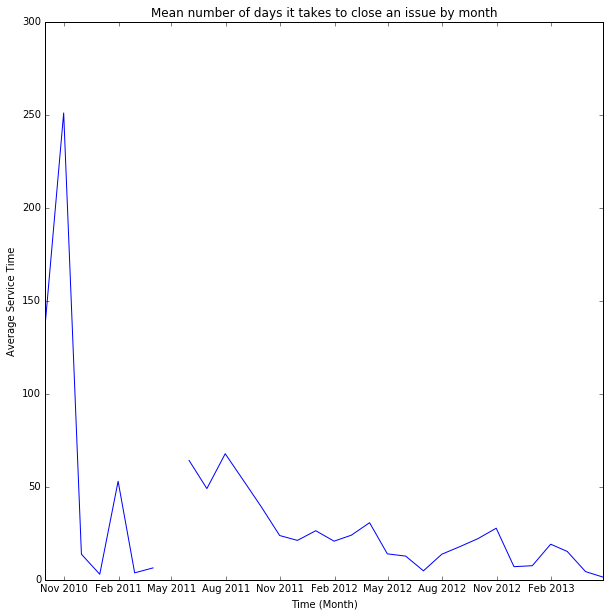

In [121]:
# ---- Plotting Results ------ #
plt.plot(res6)
plt.title('Mean number of days it takes to close an issue by month')
plt.xlabel('Time (Month)')
plt.ylabel('Average Service Time')


7) Make a DataFrame containing all the comments for all of the issues. You will
want to add an ``id`` attribute to each comment while doing so so that each row
contains a single comment and has the id of the issue it belongs to.

Convert the ``created`` column to datetime format; note you will need to multiply
the values (appropriately converted to integers) by 1000000 to get them in
nanoseconds and pass to to_datetime.


In [122]:
df3.head()

,title,created_at,labels,closed_at,user,id,service_time
1,Enable element-wise comparison operations in D...,2010-09-29 00:45:31,[],2011-02-19 23:13:48,wesm,337721,143 days 22:28:17
3,reindex_like function,2010-09-29 00:50:13,[],2010-12-17 02:57:33,wesm,337726,79 days 02:07:20
5,Binary operations on int DataMatrix,2010-09-29 00:50:52,[],2011-01-01 23:50:12,wesm,337728,94 days 22:59:20
7,Plot keyword arguments are unused in DataFrame...,2010-09-29 00:51:27,[],2010-12-11 06:14:32,wesm,337730,73 days 05:23:05
9,Python 2.7 testing,2010-09-29 00:57:00,[],2010-12-17 02:46:34,wesm,337736,79 days 01:49:34


In [125]:
df.head(5)

,assignee,body,closed_at,comments,comments_url,created_at,events_url,html_url,id,labels,labels_url,milestone,number,pull_request,state,title,updated_at,url,user
0,None,re: pystatsmodels e-mail\r\n\r\n\r\nhi everyon...,2011-02-19 23:13:48,"[{'text': 'implemented in git HEAD', 'created'...",https://api.github.com/repos/pydata/pandas/iss...,2010-09-29 00:45:31,https://api.github.com/repos/pydata/pandas/iss...,https://github.com/pydata/pandas/issues/1,337721,[],https://api.github.com/repos/pydata/pandas/iss...,None,1,"{'diff_url': None, 'html_url': None, 'patch_ur...",closed,Enable element-wise comparison operations in D...,2013-04-26 21:25:39,https://api.github.com/repos/pydata/pandas/iss...,{'followers_url': 'https://api.github.com/user...
1,None,re: pystatsmodels e-mail\r\n\r\n\r\nhi everyon...,2011-02-19 23:13:48,"[{'text': 'implemented in git HEAD', 'created'...",https://api.github.com/repos/pydata/pandas/iss...,2010-09-29 00:45:31,https://api.github.com/repos/pydata/pandas/iss...,https://github.com/pydata/pandas/issues/1,337721,[],https://api.github.com/repos/pydata/pandas/iss...,None,1,"{'diff_url': None, 'html_url': None, 'patch_ur...",closed,Enable element-wise comparison operations in D...,2013-04-26 21:25:39,https://api.github.com/repos/pydata/pandas/iss...,{'followers_url': 'https://api.github.com/user...
2,None,"In Series, DataMatrix, WidePanel, etc.",2010-12-17 02:57:33,"[{'text': 'done', 'created': '1292554653000', ...",https://api.github.com/repos/pydata/pandas/iss...,2010-09-29 00:50:13,https://api.github.com/repos/pydata/pandas/iss...,https://github.com/pydata/pandas/issues/2,337726,[],https://api.github.com/repos/pydata/pandas/iss...,None,2,"{'diff_url': None, 'html_url': None, 'patch_ur...",closed,reindex_like function,2013-04-26 21:25:39,https://api.github.com/repos/pydata/pandas/iss...,{'followers_url': 'https://api.github.com/user...
3,None,"In Series, DataMatrix, WidePanel, etc.",2010-12-17 02:57:33,"[{'text': 'done', 'created': '1292554653000', ...",https://api.github.com/repos/pydata/pandas/iss...,2010-09-29 00:50:13,https://api.github.com/repos/pydata/pandas/iss...,https://github.com/pydata/pandas/issues/2,337726,[],https://api.github.com/repos/pydata/pandas/iss...,None,2,"{'diff_url': None, 'html_url': None, 'patch_ur...",closed,reindex_like function,2013-04-26 21:25:39,https://api.github.com/repos/pydata/pandas/iss...,{'followers_url': 'https://api.github.com/user...
4,None,"Reported by kwgoodman, Jun 12, 2010\r\nWhen ad...",2011-01-01 23:50:12,[{'text': 'I guess I &quot;accidentally&quot; ...,https://api.github.com/repos/pydata/pandas/iss...,2010-09-29 00:50:52,https://api.github.com/repos/pydata/pandas/iss...,https://github.com/pydata/pandas/issues/3,337728,[],https://api.github.com/repos/pydata/pandas/iss...,None,3,"{'diff_url': None, 'html_url': None, 'patch_ur...",closed,Binary operations on int DataMatrix,2011-01-01 23:50:12,https://api.github.com/repos/pydata/pandas/iss...,{'followers_url': 'https://api.github.com/user...


In [126]:
Df = df[['created_at', 'closed_at', 'id', 'comments']]
type(Df)

pandas.core.frame.DataFrame

In [133]:
Df.shape #(2968,4)

(2968, 4)

In [134]:
#----- Drop all duplicated -----#
Df2 = Df.drop_duplicates(subset='id', keep = "last")

In [137]:
Df2.shape #(2934, 4)

(2934, 4)

In [138]:
Df.head(3)

,created_at,closed_at,id,comments
0,2010-09-29 00:45:31,2011-02-19 23:13:48,337721,"[{'text': 'implemented in git HEAD', 'created'..."
1,2010-09-29 00:45:31,2011-02-19 23:13:48,337721,"[{'text': 'implemented in git HEAD', 'created'..."
2,2010-09-29 00:50:13,2010-12-17 02:57:33,337726,"[{'text': 'done', 'created': '1292554653000', ..."


In [144]:
# Basic Testing: Ignore
#for i in range(len(Df)):
    #print((Df.ix[i, 'created_at']-Df.ix[i, 'closed_at']).total_seconds())
    